In [53]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

list_names = ['User3', 'User4', 'User5', 'User6', 'User7']

#list_names = ['User1','User3', 'User4', 'User5', 'User6', 'User7']
nbUsers = len(list_names)

list_alpha = [0, 0.25, 0.5, 0.75, 1]#, 0.05, 0.1, 0.15, 0.2, 0.3]
nbAlpha = len(list_alpha)

list_beta = [1.05]
list_gamma = [0]

nbBetaGamma = len(list_beta)

In [54]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [55]:
globalAnalysis = pd.DataFrame()
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        globalAnalysis = pd.concat([betaGammaSummary, globalAnalysis], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)




In [56]:
analysisBoneDistPerScale = pd.DataFrame()
analysisBoneDistPerObj = pd.DataFrame()
analysisBoneDistPerTask = pd.DataFrame()


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-BoneDist-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerObj = pd.concat([betaGammaSummary, analysisBoneDistPerObj], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-BoneDist-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerTask = pd.concat([betaGammaSummary, analysisBoneDistPerTask], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-BoneDist-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerScale = pd.concat([betaGammaSummary, analysisBoneDistPerScale], axis = 0, sort = True)

    

In [57]:
#This is the mean over all the users
meanUsers = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanUsersBeta = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Beta'] == list_beta[paramB]) & (globalAnalysis['Gamma'] == list_gamma[paramB])
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        for j in range(0, 38):
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
            #meanUsers.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)+'.Beta.'+str(list_beta[paramB]+'.Gamma.'+str(list_gamma[paramB]))] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            #meanUsers.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)+'.Beta.'+str(list_beta[paramB]+'.Gamma.'+str(list_gamma[paramB]))] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

        meanUsers = pd.concat([meanUsersBeta, meanUsers], axis = 0, sort = True)
            

In [58]:
analysisPerScale.head()

Beta  Gamma  Tolerance   User      large     medium      small
Tolerance                                                                
0          1.05    0.0          0  User7   8.153347  11.828096  12.638123
300        1.05    0.0        300  User7  15.096847  29.917162  26.783204
350        1.05    0.0        350  User7  16.355844  33.126409  28.874186
400        1.05    0.0        400  User7  17.524654  36.416714  31.901207
450        1.05    0.0        450  User7  18.432336  39.016677  33.990390

In [59]:
meanPerObj = pd.DataFrame()
meanPerTask = pd.DataFrame()
meanPerScale = pd.DataFrame()


for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanPerObjB = pd.DataFrame()
        meanPerScaleB = pd.DataFrame()
        meanPerTaskB = pd.DataFrame()
        
        cond = (analysisPerScale['Tolerance'] == analysisPerScale['Tolerance'].iloc[tol]) & (analysisPerScale['Beta'] == list_beta[paramB]) & (analysisPerScale['Gamma'] == list_gamma[paramB])
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        for j in range(0, len(objects)):
            meanPerObjB.loc[globalAnalysis['Tolerance'].iloc[tol], objects[j]] = analysisPerObj[cond][objects[j]].mean()
        meanPerObj = pd.concat([meanPerObjB, meanPerObj], axis = 0, sort = True)
        
        for j in range(0, len(tasks)):
            meanPerTaskB.loc[globalAnalysis['Tolerance'].iloc[tol], tasks[j]] = analysisPerTask[cond][tasks[j]].mean()
        meanPerTask = pd.concat([meanPerTaskB, meanPerTask], axis = 0, sort = True)
        
        for j in range(0, len(scales)):
            meanPerScaleB.loc[globalAnalysis['Tolerance'].iloc[tol], scales[j]] = analysisPerScale[cond][scales[j]].mean()
        meanPerScale = pd.concat([meanPerScaleB, meanPerScale], axis = 0, sort = True)
        
        
           

In [60]:
allConfig = pd.DataFrame()

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-AllConfigTypes-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Config'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Config'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary.index = betaGammaSummary['Tolerance']
        #betaGammaSummary['Beta'] = float(beta)
        #betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        allConfig = pd.concat([betaGammaSummary, allConfig], axis = 0, sort = True)

In [61]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.1000  \
0       0                  0.0               20.668150   
1       1                  0.0               20.221333   
2       2                  0.0                6.033500   
3       3                  0.0              124.335112   
4       4                  0.0               15.602980   

   DistBoneInTolTime.1050  DistBoneInTolTime.1100  DistBoneInTolTime.1150  \
0               16.915950                  8.9113                8.911300   
1               18.296111                 17.2285               16.575078   
2                6.033500                  6.0335                6.033500   
3              126.806100                126.8061              126.806100   
4               16.581000                 16.5810               16.581000   

   DistBoneInTolTime.1200  DistBoneInTolTime.1250  DistBoneInTolTime.1300  \
0                4.611450                3.975500                3.268250   
1               14.255689               12.668978               11.393844   
2               28.897800               28.560950               24.501050   
3              126.806100              126.806100              126.806100   
4               16.581000               16.581000               16.581000   

   DistBoneInTolTime.1350  ...  DistanceInTolTime.700  DistanceInTolTime.750  \
0                6.827150  ...              12.524004              13.041904   
1                8.346667  ...              24.381772              30.669361   
2               14.038450  ...              33.837748              33.837748   
3              126.806100  ...              32.037212              34.162912   
4               16.581000  ...              16.453606              16.687146   

   DistanceInTolTime.800  DistanceInTolTime.850  DistanceInTolTime.900  \
0              18.331204              22.430254              30.283404   
1              32.333505              32.461250              34.153505   
2              33.837748              33.837748              33.837748   
3              36.186137              40.156112              42.729250   
4              16.983106              20.062946              22.473846   

   DistanceInTolTime.950   Obj  Scale       Task   User  
0              33.337604  obj0  small      Touch  User7  
1              39.221616  obj0  small      Raise  User7  
2              33.837748  obj0  small       Pull  User7  
3              46.259637  obj0  small       Push  User7  
4              24.398846  obj0  small  Push Down  User7  

[5 rows x 77 columns]

In [62]:
meanPerScale.tail()

Beta  Gamma      large     medium      small
450  1.05    0.0  19.233518  41.032294  30.625341
400  1.05    0.0  17.835933  37.490978  28.041554
350  1.05    0.0  16.203997  33.138341  25.167188
300  1.05    0.0  14.621429  29.417999  22.324742
0    1.05    0.0   4.980111  11.064937   8.689188

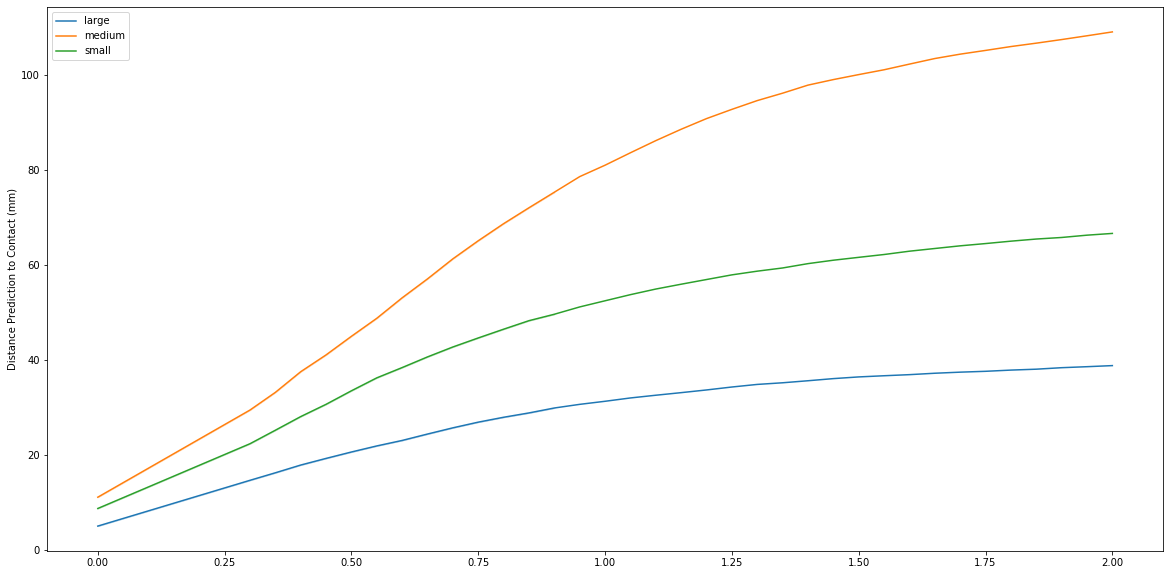

In [63]:
plt.figure(figsize = (20,10))
cond = (meanPerScale['Beta'] == 1.05) & (meanPerScale['Gamma'] == 0)
toleranceplt = meanPerScale.index/1000
sns.lineplot(x = toleranceplt , y = 'large', data = meanPerScale, label = 'large')
sns.lineplot(x = toleranceplt, y = 'medium', data = meanPerScale, label = 'medium')#[cond])
sns.lineplot(x = toleranceplt, y = 'small', data = meanPerScale, label = 'small')#[cond])
plt.ylabel('Distance Prediction to Contact (mm)')
plt.xlabel = ('Time')
plt.legend()

In [64]:
globalAnalysis

Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  \
Tolerance                                                           
0          1.05    0.000000    0.000000     0.000000     0.000000   
300        1.05   40.166869   40.166869    26.078804    20.285937   
350        1.05   40.159300   40.159300    28.908417    23.606270   
400        1.05   47.371315   47.371315    31.063479    26.968669   
450        1.05   58.821469   58.821469    33.825996    30.474776   
500        1.05   80.358746   80.358746    38.471513    35.600283   
550        1.05   82.849869   82.849869    42.813454    39.506330   
600        1.05   83.714831   83.714831    46.402934    44.441265   
650        1.05   86.191400   86.191400    52.657801    49.631185   
700        1.05   84.113738   84.113738    55.412678    51.661017   
750        1.05  100.966754  100.966754    56.564086    51.148806   
800        1.05  106.827854  106.827854    57.102932    53.098039   
850        1.05  121.291877  121.291877    62.117878    55.028974   
900        1.05  121.001277  121.001277    64.727886    57.357244   
950        1.05  121.791692  121.791692    65.548889    58.205337   
1000       1.05  122.091615  122.091615    67.400589    60.750974   
1050       1.05  122.534854  122.534854    73.734081    62.259474   
1100       1.05  122.804515  122.804515    76.583331    65.477269   
1150       1.05  123.048700  123.048700    77.225856    67.357870   
1200       1.05  112.677262  112.677262    78.730456    70.225080   
1250       1.05  113.492069  113.492069    78.528597    73.349283   
1300       1.05  113.499931  113.499931    85.307375    76.284256   
1350       1.05  114.083215  114.083215    86.338150    78.793000   
1400       1.05  123.298515  123.298515    88.283196    82.480320   
1450       1.05  123.470992  123.470992    91.203133    83.824894   
1500       1.05  123.458100  123.458100    98.749779    84.624561   
1550       1.05  123.454385  123.454385   106.007354    88.688178   
1600       1.05  123.449469  123.449469   106.171738    93.824776   
1650       1.05  123.805154  123.805154   108.067975    94.980244   
1700       1.05  123.766754  123.766754   108.987425    95.920269   
...         ...         ...         ...          ...          ...   
550        1.05   30.747506   32.475769    41.527850    42.415323   
600        1.05   29.605901   31.334163    44.011778    46.185427   
650        1.05   31.586944   33.780401    47.532117    50.917067   
700        1.05   31.074725   31.928881    49.893821    53.482393   
750        1.05   49.143900   49.998056    51.725807    55.558434   
800        1.05   55.348075   56.202231    51.508838    58.686737   
850        1.05   70.157994   71.012150    54.530774    64.014903   
900        1.05   74.469069   79.131094    56.136393    72.874982   
950        1.05   86.005719   91.279494    64.003722    77.024458   
1000       1.05  102.479388  103.945294    65.037281    82.445448   
1050       1.05  107.970344  111.566600    64.623112    83.572354   
1100       1.05  113.993437  118.416925    65.120678    88.638311   
1150       1.05  121.961938  123.643325    67.753026    88.812123   
1200       1.05  124.340706  125.830963    71.022374    93.422582   
1250       1.05  126.743819  128.234075    70.099948    95.420699   
1300       1.05  129.270175  130.124331    71.873428    97.075020   
1350       1.05  129.785175  131.741788    74.555503    98.402509   
1400       1.05  132.314506  134.271119    75.945610   104.232013   
1450       1.05  133.684969  134.539125    80.441426   105.790974   
1500       1.05  137.188550  138.042706    85.658498   106.510459   
1550       1.05  136.730944  137.354737    96.534016   109.700514   
1600       1.05  136.872369  137.496163    98.882890   113.693095   
1650       1.05  138.632956  140.170425   102.432940   114.288290   
1700       1.05  140.697919  142.221419   106.418884   116.008778   
1750       1.05  146.708013  147.676725   104.628078   119.480362   
1800     

In [65]:
analysisPerTask.head()

Beta  Gamma       Pull       Push  Push Down      Raise  Tolerance  \
Tolerance                                                                       
0          1.05    0.0   7.318321   9.118268  14.236102  10.379684          0   
300        1.05    0.0  14.340573  24.064205  28.281379  28.287707        300   
350        1.05    0.0  16.263863  26.515620  30.091258  31.178506        350   
400        1.05    0.0  17.947027  29.211089  33.173195  34.791283        400   
450        1.05    0.0  19.824511  30.791983  35.622938  36.715741        450   

               Touch   User  
Tolerance                    
0          13.313568  User7  
300        24.688157  User7  
350        26.544820  User7  
400        27.948364  User7  
450        29.443830  User7

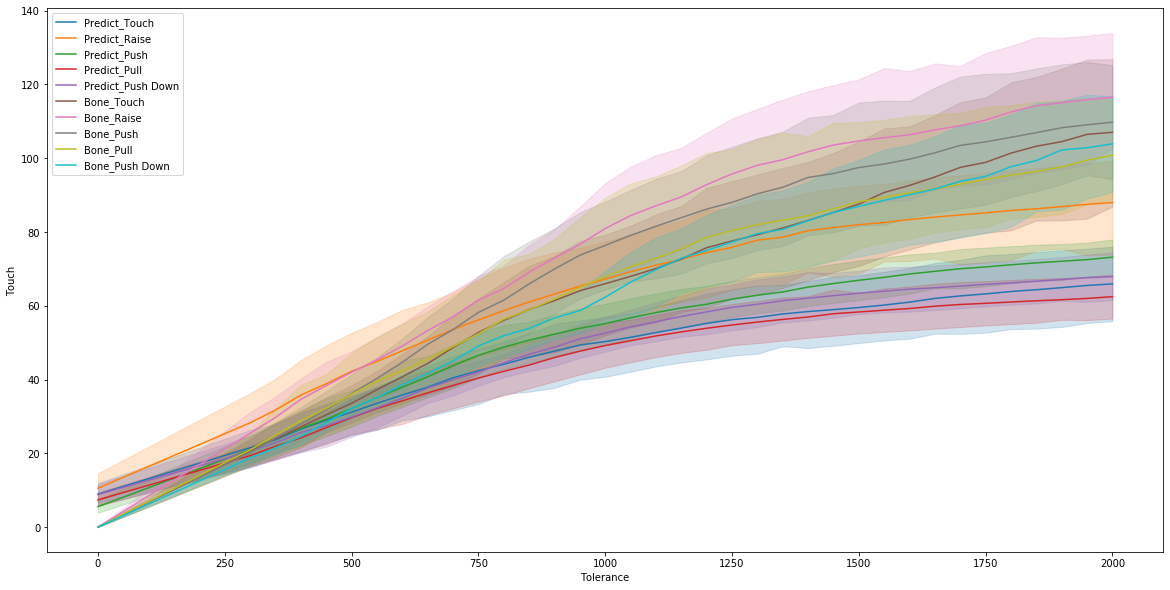

In [66]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')

#plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')


In [67]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.1000  \
0       0                  0.0               20.668150   
1       1                  0.0               20.221333   
2       2                  0.0                6.033500   
3       3                  0.0              124.335112   
4       4                  0.0               15.602980   

   DistBoneInTolTime.1050  DistBoneInTolTime.1100  DistBoneInTolTime.1150  \
0               16.915950                  8.9113                8.911300   
1               18.296111                 17.2285               16.575078   
2                6.033500                  6.0335                6.033500   
3              126.806100                126.8061              126.806100   
4               16.581000                 16.5810               16.581000   

   DistBoneInTolTime.1200  DistBoneInTolTime.1250  DistBoneInTolTime.1300  \
0                4.611450                3.975500                3.268250   
1               14.255689               12.668978               11.393844   
2               28.897800               28.560950               24.501050   
3              126.806100              126.806100              126.806100   
4               16.581000               16.581000               16.581000   

   DistBoneInTolTime.1350  ...  DistanceInTolTime.700  DistanceInTolTime.750  \
0                6.827150  ...              12.524004              13.041904   
1                8.346667  ...              24.381772              30.669361   
2               14.038450  ...              33.837748              33.837748   
3              126.806100  ...              32.037212              34.162912   
4               16.581000  ...              16.453606              16.687146   

   DistanceInTolTime.800  DistanceInTolTime.850  DistanceInTolTime.900  \
0              18.331204              22.430254              30.283404   
1              32.333505              32.461250              34.153505   
2              33.837748              33.837748              33.837748   
3              36.186137              40.156112              42.729250   
4              16.983106              20.062946              22.473846   

   DistanceInTolTime.950   Obj  Scale       Task   User  
0              33.337604  obj0  small      Touch  User7  
1              39.221616  obj0  small      Raise  User7  
2              33.837748  obj0  small       Pull  User7  
3              46.259637  obj0  small       Push  User7  
4              24.398846  obj0  small  Push Down  User7  

[5 rows x 77 columns]

In [68]:
allConfig['DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig.loc[allConfig['DistanceInTolTime.0'] <= 0, 'DistInTolTime.0'] = 0
#allConfig.loc[allConfig['DistanceInTolTime.0'] > 0, 'DistInTolTime.0'] = allConfig['DistanceInTolTime.0']

for tol in range(300, 2050, 50):
    allConfig['DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] <= 0, 'DistInTolTime.'+str(tol)] = 0
    #allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] > 0, 'DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    

In [69]:
taskScale = pd.DataFrame()

tol = 300
for size in range(0, len(scales)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
        
        
taskObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
        
        
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        scaleObj.loc[scales[size], objects[obj]] = mean/nbUsers        

In [70]:
taskObj

Touch      Raise       Pull       Push  Push Down
obj0      18.333144  17.993859  11.347921  19.092810  18.193513
obj1      21.718102  27.925598  24.140856  25.136920  20.213338
obj2      14.606910  22.524319  11.968262  18.867672  10.989101
obj3      20.336117  19.260119   9.216273  16.519394  19.715249
obj4      23.675181  22.172384  28.023060  19.809333  22.037055
obj5      18.937889  31.241572  20.425055  23.163666  17.998187
obj6      28.675975  56.503266  27.415137  24.394798  22.471342
Cube      17.441246  30.754255  17.925074  27.160549  25.246512
Cylinder  30.351897  26.238382  25.657223  16.033861  28.122779

In [71]:
taskScale

Touch      Raise       Pull       Push  Push Down
small   23.781293  24.397972  20.515046  21.619089  21.626666
medium  26.923901  37.421153  28.699675  27.490959  26.580272
large   13.986960  23.052126   9.491566  14.282953  13.455421

In [72]:
scaleObj

obj0       obj1       obj2       obj3       obj4       obj5  \
small   16.584286  25.927784  15.240500  16.029728  18.089324  21.335846   
medium  24.473013  26.214019  23.325052  25.646702  27.753646  30.761883   
large    9.919449  19.339086   8.808208   9.351861  23.587238  14.962092   

             obj6       Cube   Cylinder  
small   34.408073  29.045534  24.831043  
medium  42.450138  30.238753  33.945523  
large   18.818100  11.832295  17.065919

# Scales and Tasks

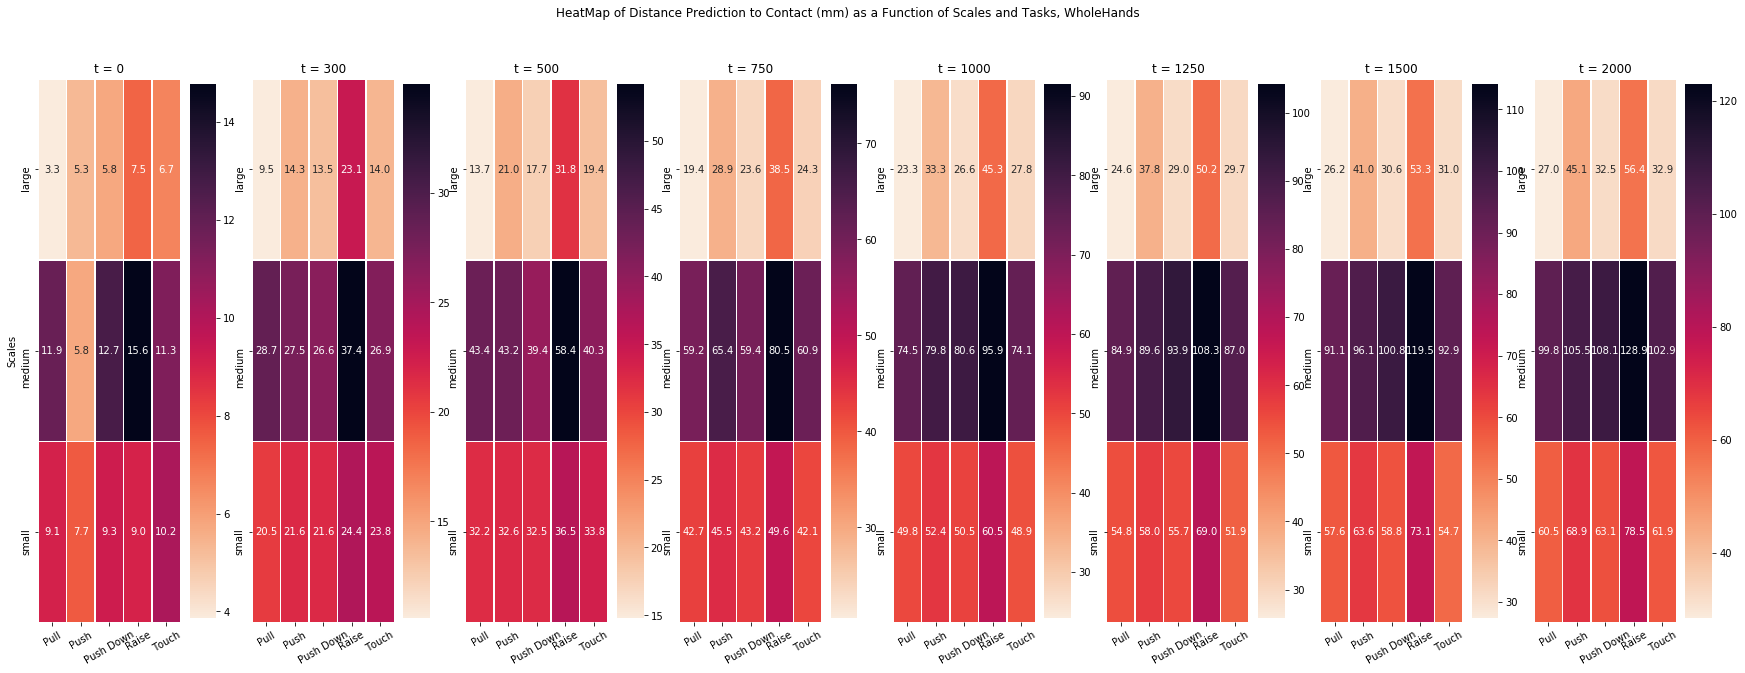

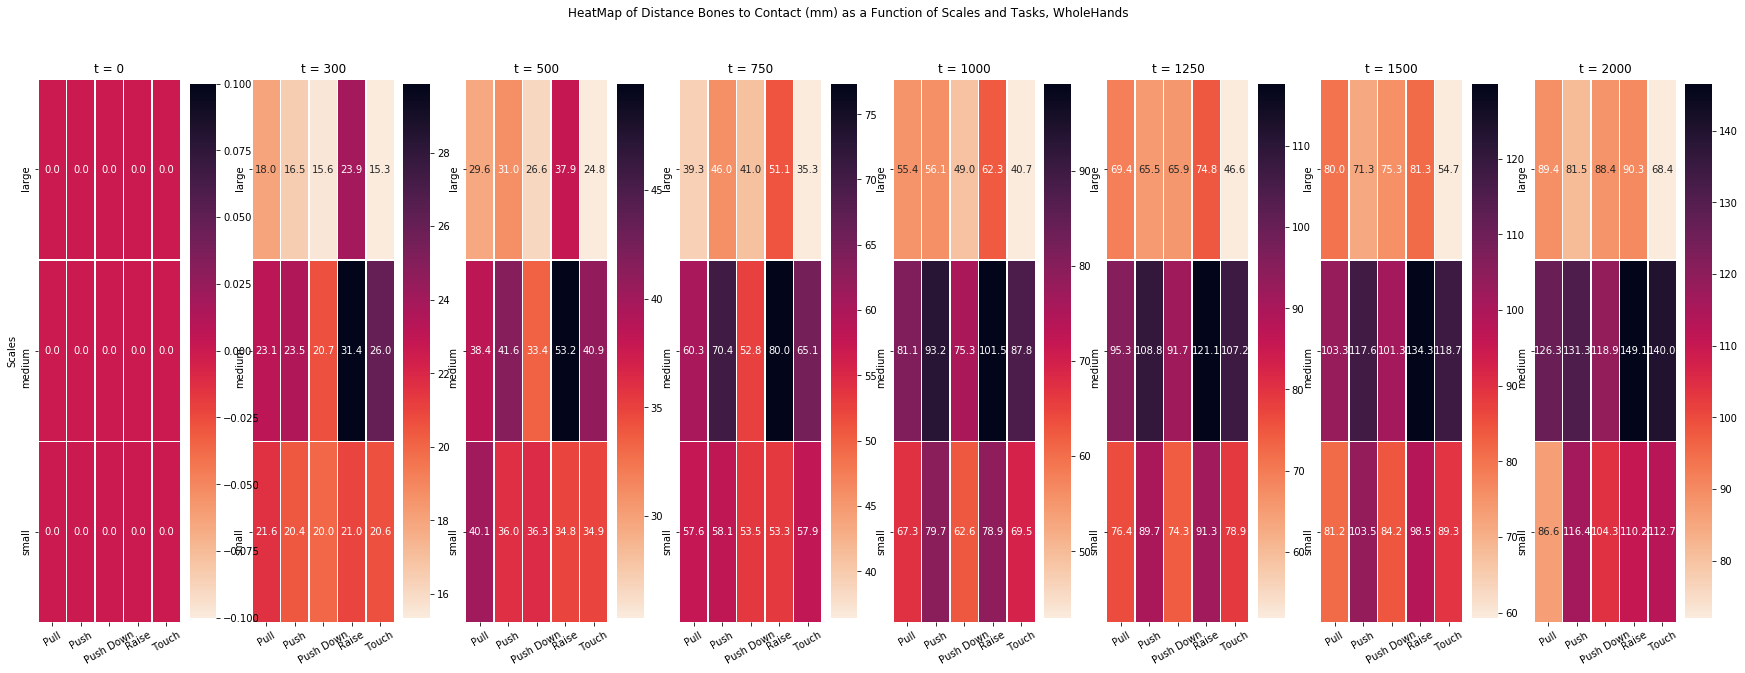

In [73]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Tasks, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Tasks, WholeHands')

plt.show()

In [74]:

tol = 300
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == 'obj6') & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)]
            

# Scales and Objects

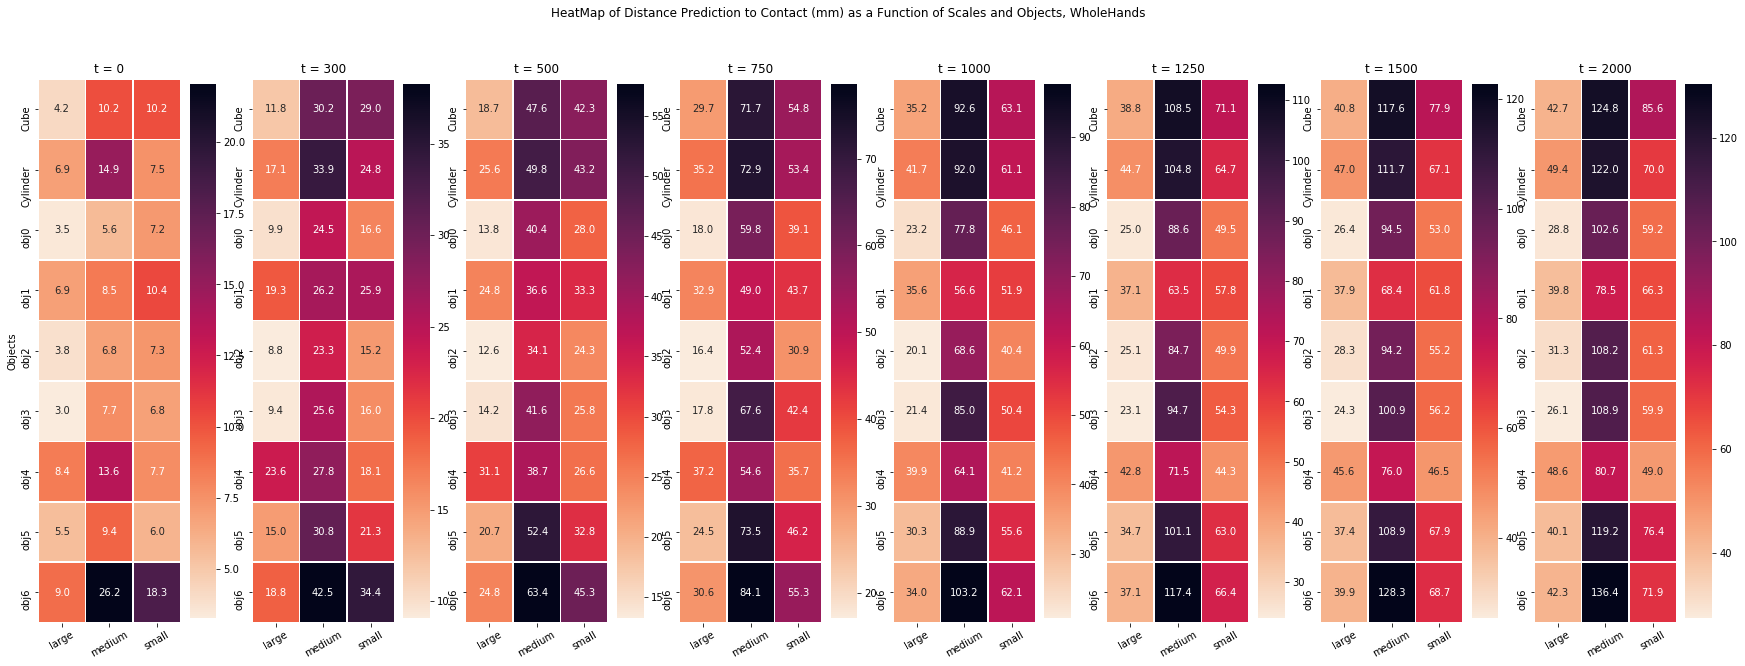

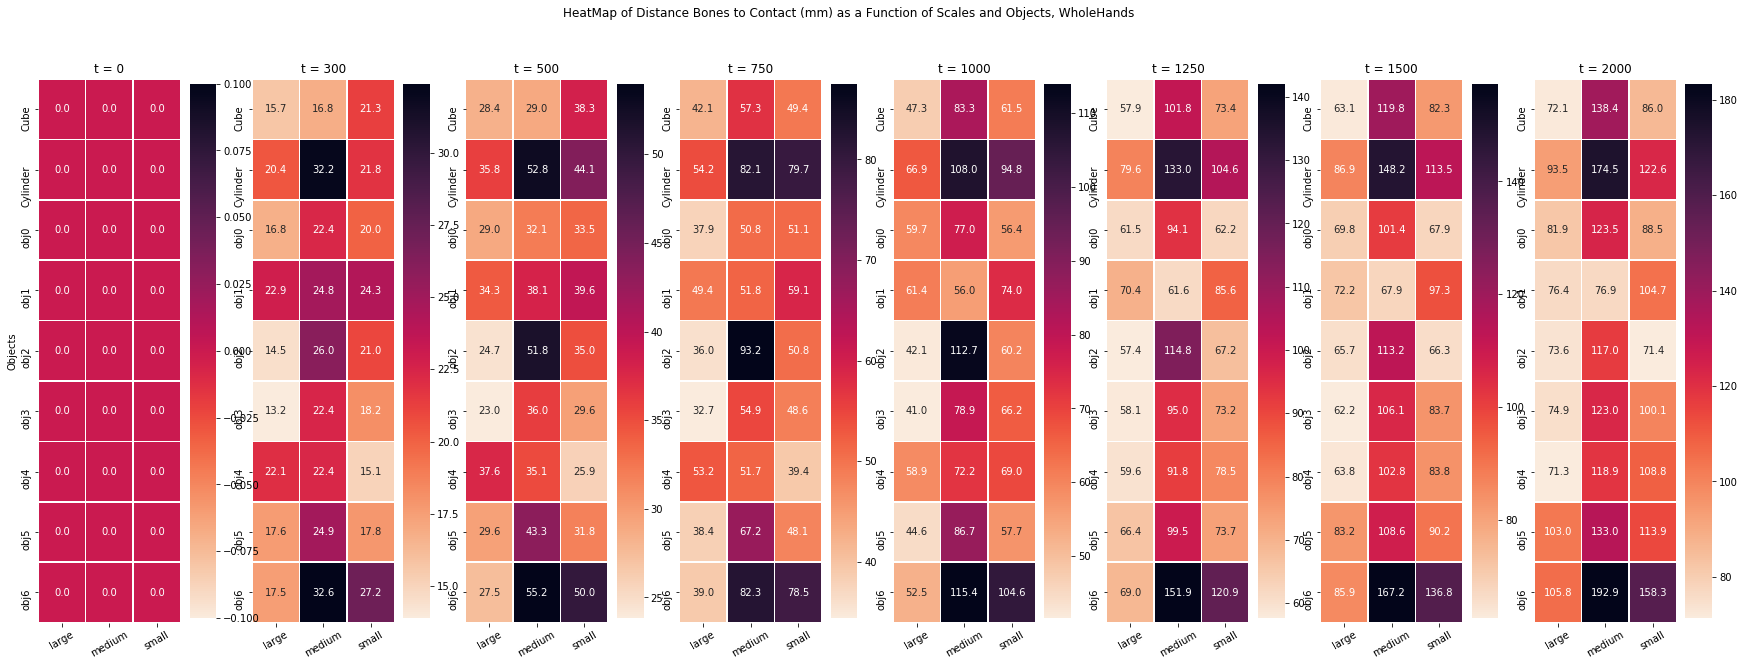

In [75]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers        
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Objects, WholeHands')

plt.show()

# Tasks and Objects

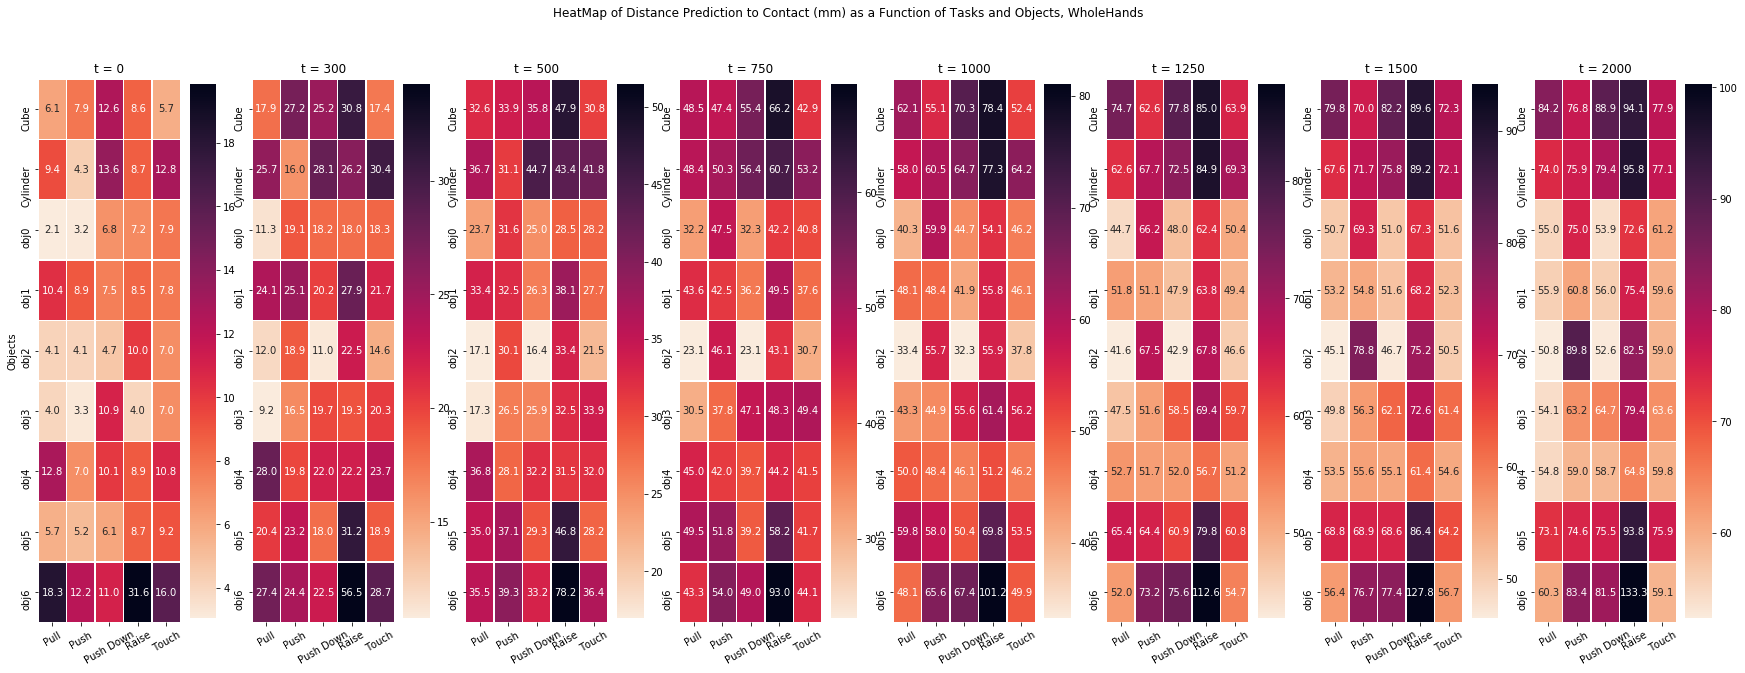

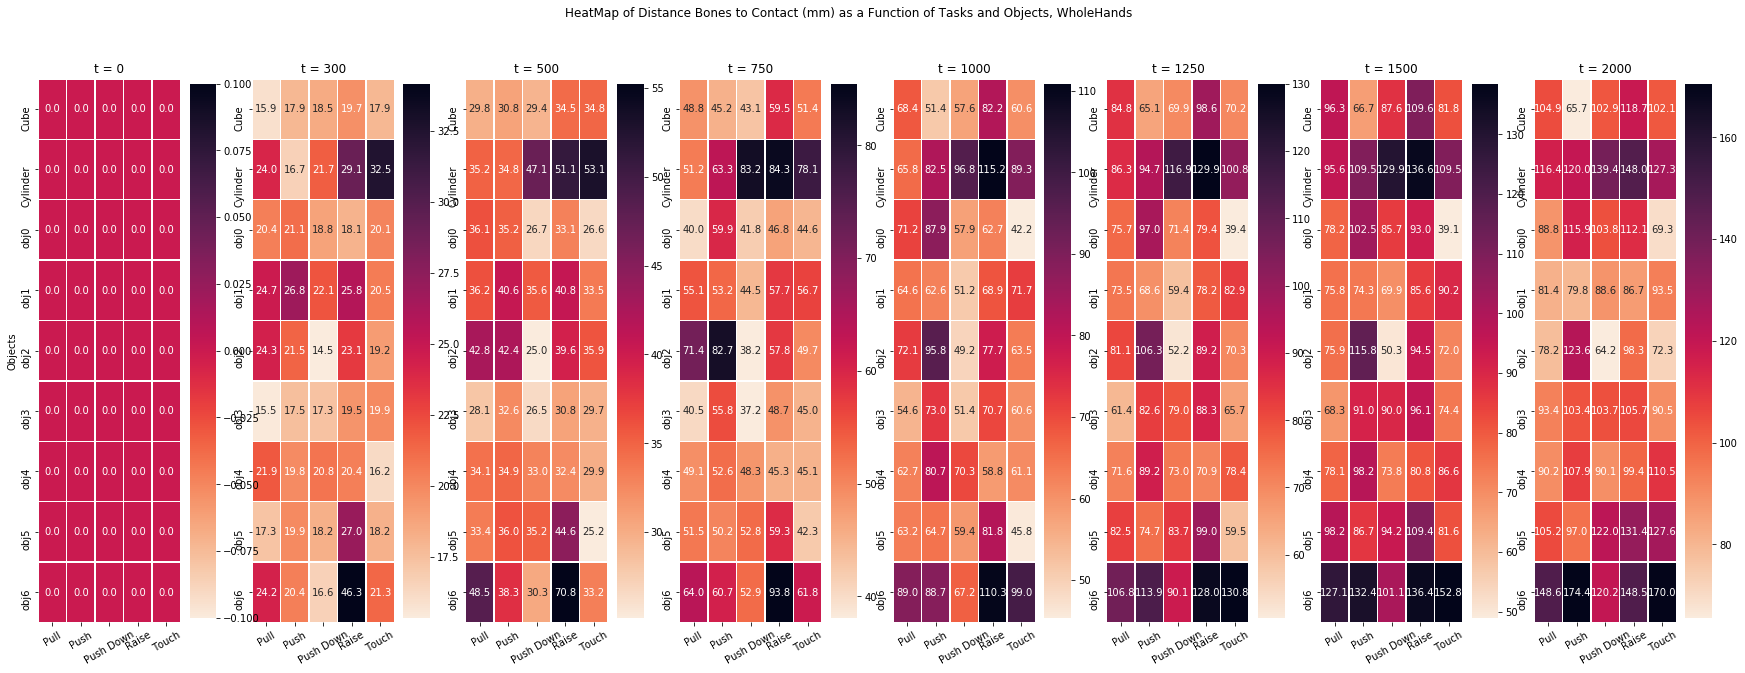

In [76]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Tasks and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Tasks and Objects, WholeHands')

plt.show()